In [1]:
import numpy as np
import networkx as nx

# Creating a sample graph with node attributes, where the attribute could be anything - for instance, transaction frequency.
G = nx.Graph()
G.add_node("A", attribute=10)
G.add_node("B", attribute=20)
G.add_node("C", attribute=30)

# Normalize the node attributes
attributes = nx.get_node_attributes(G, 'attribute')
max_attr = max(attributes.values())
min_attr = min(attributes.values())

# Normalizing attributes brings them to a common scale, often between 0 and 1.
for node in G.nodes():
    G.nodes[node]['normalized_attr'] = (G.nodes[node]['attribute'] - min_attr) / (max_attr - min_attr)

print(nx.get_node_attributes(G, 'normalized_attr'))


{'A': 0.0, 'B': 0.5, 'C': 1.0}


In [ ]:
Node2Vec

In [1]:
# !pip install --upgrade networkx scipy

In [16]:
import csv

In [17]:
def parse_metadata(text):
    # Splitting the text by "Id: " to get individual product blocks
    product_blocks = [block for block in text.split("Id:") if block.strip()]

    products = []
    reviews = []

    for block in product_blocks:
        product = {}
        
        # Extracting product details
        product["Id"] = int(re.search(r"(\d+)", block).group())
        
        asin_match = re.search(r"ASIN: (\S+)", block)
        if not asin_match:
            continue  # Skip products without ASIN
        product["ASIN"] = asin_match.group(1)
        
        title_match = re.search(r"title: (.+)", block)
        product["title"] = title_match.group(1).strip() if title_match else ""
        
        group_match = re.search(r"group: (.+)", block)
        product["group"] = group_match.group(1).strip() if group_match else ""
        
        salesrank_match = re.search(r"salesrank: (\d+)", block)
        product["salesrank"] = int(salesrank_match.group(1)) if salesrank_match else None
        
        similar_match = re.search(r"similar: \d+ (.+)", block)
        product["similar"] = ", ".join(similar_match.group(1).split()) if similar_match else ""
        
        categories_match = re.findall(r"\|([^\|]+)", block)
        product["categories"] = " | ".join(categories_match)
        
        reviews_info = re.search(r"reviews: total: \d+  downloaded: \d+  avg rating: (\d(\.\d)?)", block)
        product["total_reviews"] = int(re.search(r"total: (\d+)", reviews_info.group()).group(1)) if reviews_info else 0
        product["avg_rating"] = float(reviews_info.group(1)) if reviews_info else 0.0
        
        products.append(product)
        
        # Extracting review details
        review_lines = re.findall(r"(\d{4}-\d{1,2}-\d{1,2}  cutomer: \S+  rating: \d  votes:   \d+  helpful:   \d+)", block)
        for line in review_lines:
            review = {}
            review["Id"] = product["Id"]
            review["review_date"] = re.search(r"(\d{4}-\d{1,2}-\d{1,2})", line).group(1)
            review["customer_id"] = re.search(r"cutomer: (\S+)", line).group(1)
            review["rating"] = int(re.search(r"rating: (\d)", line).group(1))
            review["votes"] = int(re.search(r"votes:   (\d+)", line).group(1))
            review["helpful_votes"] = int(re.search(r"helpful:   (\d+)", line).group(1))
            
            reviews.append(review)

    return products, reviews

In [21]:
with open('amazon-meta.txt', 'r') as file:
    amzn_metadata = file.read()

parsed_products, parsed_reviews = parse_metadata(amzn_metadata)

# Saving products to CSV
product_fields = ["Id", "ASIN", "title", "group", "salesrank", "similar", "categories", "total_reviews", "avg_rating"]
with open("products.csv", "w", encoding="utf-8", newline='') as csvfile:
    writer = csv.DictWriter(csvfile, fieldnames=product_fields)
    writer.writeheader()
    for product in parsed_products:
        writer.writerow(product)

# Saving reviews to CSV
review_fields = ["Id", "review_date", "customer_id", "rating", "votes", "helpful_votes"]
with open("reviews.csv", "w", encoding="utf-8", newline='') as csvfile:
    writer = csv.DictWriter(csvfile, fieldnames=review_fields)
    writer.writeheader()
    for review in parsed_reviews:
        writer.writerow(review)


In [2]:
import pandas as pd

# Read the CSV files into pandas dataframes
products_df = pd.read_csv('products.csv')
reviews_df = pd.read_csv('reviews.csv')

# Display the first few rows of each dataframe to inspect the data
print("Products Data:")
print(products_df.head())

print("\nReviews Data:")
print(reviews_df.head())


Products Data:
   Id        ASIN                                              title group  \
0   0  0771044445                                                NaN   NaN   
1   1  0827229534            Patterns of Preaching: A Sermon Sampler  Book   
2   2  0738700797                         Candlemas: Feast of Flames  Book   
3   3  0486287785   World War II Allied Fighter Planes Trading Cards  Book   
4   4  0842328327  Life Application Bible Commentary: 1 and 2 Tim...  Book   

   salesrank                                            similar  \
0        NaN                                                NaN   
1   396585.0  0804215715, 156101074X, 0687023955, 0687074231...   
2   168596.0  0738700827, 1567184960, 1567182836, 0738700525...   
3  1270652.0                                                NaN   
4   631289.0  0842328130, 0830818138, 0842330313, 0842328610...   

                                          categories  total_reviews  \
0                                         

In [3]:
products_df.head()

,Id,ASIN,title,group,salesrank,similar,categories,total_reviews,avg_rating
0,0,0771044445,NaN,NaN,NaN,NaN,NaN,0,0.0
1,1,0827229534,Patterns of Preaching: A Sermon Sampler,Book,396585.0,"0804215715, 156101074X, 0687023955, 0687074231...",Books[283155] | Subjects[1000] | Religion & Sp...,2,5.0
2,2,0738700797,Candlemas: Feast of Flames,Book,168596.0,"0738700827, 1567184960, 1567182836, 0738700525...",Books[283155] | Subjects[1000] | Religion & Sp...,12,4.5
3,3,0486287785,World War II Allied Fighter Planes Trading Cards,Book,1270652.0,NaN,Books[283155] | Subjects[1000] | Home & Garden...,1,5.0
4,4,0842328327,Life Application Bible Commentary: 1 and 2 Tim...,Book,631289.0,"0842328130, 0830818138, 0842330313, 0842328610...",Books[283155] | Subjects[1000] | Religion & Sp...,1,4.0


In [4]:
products_df_cleaned = products_df.dropna()
products_df_cleaned.head()

,Id,ASIN,title,group,salesrank,similar,categories,total_reviews,avg_rating
1,1,0827229534,Patterns of Preaching: A Sermon Sampler,Book,396585.0,"0804215715, 156101074X, 0687023955, 0687074231...",Books[283155] | Subjects[1000] | Religion & Sp...,2,5.0
2,2,0738700797,Candlemas: Feast of Flames,Book,168596.0,"0738700827, 1567184960, 1567182836, 0738700525...",Books[283155] | Subjects[1000] | Religion & Sp...,12,4.5
4,4,0842328327,Life Application Bible Commentary: 1 and 2 Tim...,Book,631289.0,"0842328130, 0830818138, 0842330313, 0842328610...",Books[283155] | Subjects[1000] | Religion & Sp...,1,4.0
5,5,1577943082,Prayers That Avail Much for Business: Executive,Book,455160.0,"157794349X, 0892749504, 1577941829, 0892749563...",Books[283155] | Subjects[1000] | Religion & Sp...,0,0.0
6,6,0486220125,How the Other Half Lives: Studies Among the Te...,Book,188784.0,"0486401960, 0452283612, 0486229076, 0714840343...",Books[283155] | Subjects[1000] | Arts & Photog...,17,4.0


In [33]:
import pandas as pd

df = pd.read_csv('amazon0302.txt', sep='\t')

In [34]:
df.head(100)

,FromNodeId,ToNodeId
0,0,1
1,0,2
2,0,3
3,0,4
4,0,5
...,...,...
95,20,6
96,20,7
97,20,8
98,20,23


In [35]:
# Export the DataFrame to a .csv file
df.to_csv('amzn_directed_graph.csv', index=False)

In [93]:
import networkx as nx
import pandas as pd


# Load CSV files
edges_df = pd.read_csv('amzn_directed_graph.csv')
products_df = pd.read_csv('products.csv')

# Dropping NAs in the data
products_df = products_df.dropna()

print(products_df.group.unique())

# products_df = products_df[products_df['group'] != 'Book']
# edges_df = edges_df[
#     edges_df['FromNodeId'].isin(products_df['Id']) &
#     edges_df['ToNodeId'].isin(products_df['Id'])
# ]

['Book' 'Music' 'DVD' 'Video' 'Toy' 'Video Games' 'Software'
 'Baby Product' 'Sports']


In [94]:
products_df.head()

,Id,ASIN,title,group,salesrank,similar,categories,total_reviews,avg_rating
1,1,0827229534,Patterns of Preaching: A Sermon Sampler,Book,396585.0,"0804215715, 156101074X, 0687023955, 0687074231...",Books[283155] | Subjects[1000] | Religion & Sp...,2,5.0
2,2,0738700797,Candlemas: Feast of Flames,Book,168596.0,"0738700827, 1567184960, 1567182836, 0738700525...",Books[283155] | Subjects[1000] | Religion & Sp...,12,4.5
4,4,0842328327,Life Application Bible Commentary: 1 and 2 Tim...,Book,631289.0,"0842328130, 0830818138, 0842330313, 0842328610...",Books[283155] | Subjects[1000] | Religion & Sp...,1,4.0
5,5,1577943082,Prayers That Avail Much for Business: Executive,Book,455160.0,"157794349X, 0892749504, 1577941829, 0892749563...",Books[283155] | Subjects[1000] | Religion & Sp...,0,0.0
6,6,0486220125,How the Other Half Lives: Studies Among the Te...,Book,188784.0,"0486401960, 0452283612, 0486229076, 0714840343...",Books[283155] | Subjects[1000] | Arts & Photog...,17,4.0


In [95]:
def get_product_ids_and_titles_from_title_substring(title_substring, case_sensitive=False):
    matching_products = products_df[products_df['title'].str.contains(title_substring, case=case_sensitive)]
    
    # Return product IDs and titles if found, otherwise return a message indicating not found
    if not matching_products.empty:
        ids_titles = list(zip(matching_products['Id'].tolist(), matching_products['title'].tolist()))
        return ids_titles
    else:
        return "Products with the given title substring not found."

# Example usage:
title_search = "Entrepreneurs"
products_found = get_product_ids_and_titles_from_title_substring(title_search)

if isinstance(products_found, list):
    print(f"Products with titles containing '{title_search}':")
    for product_id, title in products_found:
        print(f"- Product ID: {product_id}, Title: '{title}'")
else:
    print(products_found)


Products with titles containing 'Entrepreneurs':
- Product ID: 7841, Title: 'Free Money® for Small Businesses and Entrepreneurs (Free Money for Small Business and Entrepreneurs)'
- Product ID: 9355, Title: 'The Silicon Valley Edge: A Habitat for Innovation and Entrepreneurship'
- Product ID: 13307, Title: 'Getting Started in Entrepreneurship (Getting Started In.....)'
- Product ID: 15636, Title: 'What No One Ever Tells You About Starting Your Own Business: Real Life Start-Up Advice from 101 Successful Entrepreneurs (What No One Ever Tells You About...)'
- Product ID: 18546, Title: 'Advertising Secrets of the Written Word: The Ultimate Resource on How to Write Powerful Advertising Copy from One of America's Top Copywriters and Mail Order Entrepreneurs'
- Product ID: 19579, Title: 'Start Your Own Medical Claims Billing Service (Entrepreneurs Magazine Startup)'
- Product ID: 22196, Title: 'Entrepreneurship for Dummies'
- Product ID: 23728, Title: 'Managing Innovation and Entrepreneurship 

In [96]:
Given the input product ID: 5 titled: "Prayers That Avail Much For Business: Executive"

The recommended products based on co-purchasing patterns are:
- Product ID: 352954 titled: "Entrepreneurship"
- Product ID: 200336 titled: "Executive Temping : A Guide for Professionals"
- Product ID: 42322 titled: "Chaos or Creativity?"
- Product ID: 387069 titled: "A Handbook of Model Letters for the Busy Executive"
- Product ID: 117493 titled: "Balancing Your Body : A Self-Help Approach to Rolfing Movement"


SyntaxError: invalid syntax (2498222544.py, line 1)

In [97]:
products_df.shape

(372180, 9)

In [98]:

# Create a directed graph
G = nx.DiGraph()

# Add nodes from the products dataframe
for idx, row in products_df.iterrows():
    G.add_node(row['Id'], 
               ASIN=row['ASIN'],
               title=row['title'],
               group=row['group'],
               salesrank=row['salesrank'],
               similar=row['similar'],
               categories=row['categories'],
               total_reviews=row['total_reviews'],
               avg_rating=row['avg_rating'])

# Add edges from the edges dataframe
for idx, row in edges_df.iterrows():
    G.add_edge(row['FromNodeId'], row['ToNodeId'])


In [99]:
products_df.shape

(372180, 9)

In [100]:
products_df.group.unique()

array(['Book', 'Music', 'DVD', 'Video', 'Toy', 'Video Games', 'Software',
       'Baby Product', 'Sports'], dtype=object)

title: Patterns of Preaching: A Sermon Sampler
group: Book
salesrank: 396585.0
total_reviews: 2
avg_rating: 5.0
title: Candlemas: Feast of Flames
group: Book
salesrank: 168596.0
total_reviews: 12
avg_rating: 4.5


/var/folders/tn/8kt3y16122x35fqf_c471sy00000gn/T/ipykernel_14674/1546845799.py:30: DeprecationWarning: `alltrue` is deprecated as of NumPy 1.25.0, and will be removed in NumPy 2.0. Please use `all` instead.
  nx.draw_networkx_edges(H, pos)


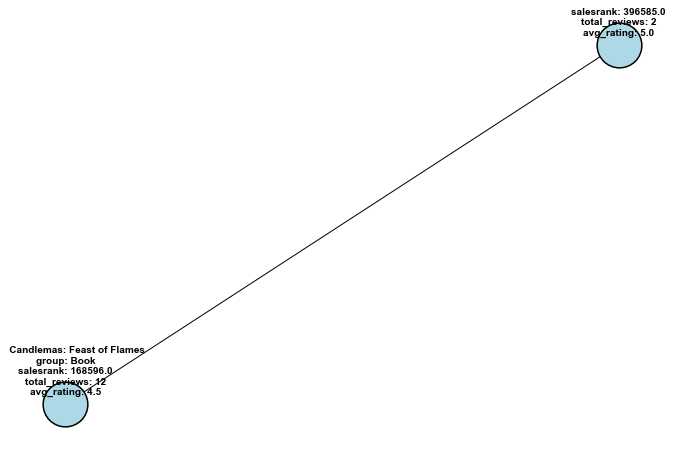

In [101]:
import matplotlib.pyplot as plt

# Find an edge where both nodes have the 'title' attribute
edge = next(e for e in G.edges() if 'title' in G.nodes[e[0]] and 'title' in G.nodes[e[1]])
two_nodes = [edge[0], edge[1]]

# Subset graph
H = G.subgraph(two_nodes)
pos = nx.spring_layout(H)

# Adjust label positions to ensure they're next to the nodes
label_pos = {node: (x, y+0.1) for node, (x, y) in pos.items()}

# Construct labels with multiple lines of metadata
labels = {}
for node in two_nodes:
    node_data = H.nodes[node]
    labels[node] = f"title: {node_data['title']}\n" \
                   f"group: {node_data['group']}\n" \
                   f"salesrank: {node_data['salesrank']}\n" \
                   f"total_reviews: {node_data['total_reviews']}\n" \
                   f"avg_rating: {node_data['avg_rating']}"

    
    print(labels[node])
    
# Visualization
plt.figure(figsize=(12, 8))
nx.draw_networkx_nodes(H, pos, node_size=2000, node_color='lightblue', edgecolors='black', linewidths=1.5)
nx.draw_networkx_edges(H, pos)
nx.draw_networkx_labels(H, label_pos, labels, font_size=10, font_family='Arial', font_weight='bold')
plt.axis('off')
plt.show()


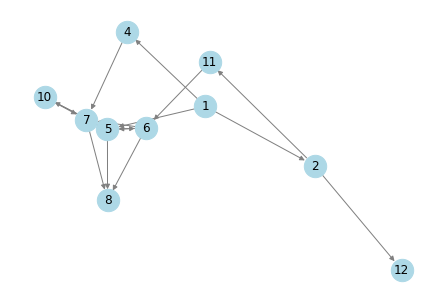

In [102]:
import matplotlib.pyplot as plt

# Draw a subset of the graph (e.g., using only the first 100 nodes and their edges)
H = G.subgraph(list(G.nodes)[:10])
pos = nx.spring_layout(H)
nx.draw(H, pos, with_labels=True, node_size=500, node_color='lightblue', edge_color='gray')
plt.show()


In [103]:
# Function to split text into two lines
def split_label(label, max_len=20):
    if len(label) <= max_len:
        return label
    split_index = label[:max_len].rfind(' ')
    if split_index == -1:
        split_index = max_len
    return label[:split_index] + '\n' + label[split_index:]


# Apply this function to each label
labels = {node: split_label(H.nodes[node]['title']) for node in H.nodes()}


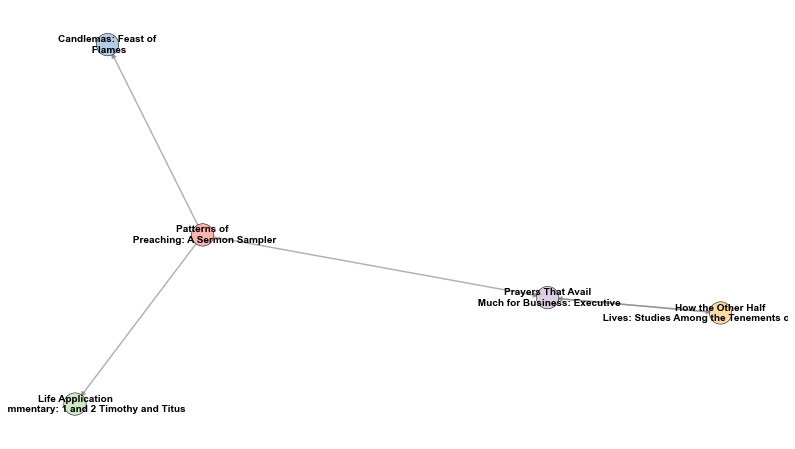

In [104]:
import matplotlib.pyplot as plt

# figure size
fig = plt.figure(figsize=(14, 8))

# Draw a subset of the graph
H = G.subgraph(list(G.nodes)[:5])
pos = nx.spring_layout(H, iterations=50)

node_colors = plt.cm.Pastel1(range(len(H)))

# Draw nodes and edges
nx.draw_networkx_nodes(H, pos, node_size=500, node_color=node_colors, edgecolors='black', linewidths=0.5)
nx.draw_networkx_edges(H, pos, edge_color='gray', alpha=0.6, width=1.5)

# Offset labels
label_pos = {node: (x, y+0.) for node, (x, y) in pos.items()}

# Draw labels
labels = {node: split_label(H.nodes[node]['title']) for node in H.nodes()}
nx.draw_networkx_labels(H, label_pos, labels, font_size=10, font_family='Arial', font_weight='bold')

plt.axis('off')
plt.show()


In [105]:
betweenness_centrality = nx.clustering(H)

In [106]:
import networkx as nx

# Degree of each node
degree = dict(G.degree())

# Clustering coefficient of each no?de
clustering_coefficient = nx.clustering(G)

# Add these as node attributes
nx.set_node_attributes(G, degree, 'degree')
nx.set_node_attributes(G, clustering_coefficient, 'clustering')

In [107]:
# Extracting graph features into a dataframe
graph_features_df = pd.DataFrame({
    'Id': list(G.nodes),
    'degree': list(degree.values()),
    'clustering': list(clustering_coefficient.values())
})

# Merging with original product features
merged_df = pd.merge(products_df, graph_features_df, on='Id')


In [108]:
merged_df.head()

,Id,ASIN,title,group,salesrank,similar,categories,total_reviews,avg_rating,degree,clustering
0,1,0827229534,Patterns of Preaching: A Sermon Sampler,Book,396585.0,"0804215715, 156101074X, 0687023955, 0687074231...",Books[283155] | Subjects[1000] | Religion & Sp...,2,5.0,6,0.285714
1,2,0738700797,Candlemas: Feast of Flames,Book,168596.0,"0738700827, 1567184960, 1567182836, 0738700525...",Books[283155] | Subjects[1000] | Religion & Sp...,12,4.5,7,0.125000
2,4,0842328327,Life Application Bible Commentary: 1 and 2 Tim...,Book,631289.0,"0842328130, 0830818138, 0842330313, 0842328610...",Books[283155] | Subjects[1000] | Religion & Sp...,1,4.0,30,0.100462
3,5,1577943082,Prayers That Avail Much for Business: Executive,Book,455160.0,"157794349X, 0892749504, 1577941829, 0892749563...",Books[283155] | Subjects[1000] | Religion & Sp...,0,0.0,59,0.035129
4,6,0486220125,How the Other Half Lives: Studies Among the Te...,Book,188784.0,"0486401960, 0452283612, 0486229076, 0714840343...",Books[283155] | Subjects[1000] | Arts & Photog...,17,4.0,103,0.008475


In [109]:
nan_columns = merged_df.columns[merged_df.isna().any()].tolist()
nan_columns

[]

In [110]:
merged_df.shape

(372180, 11)

In [111]:
merged_df_cleaned = merged_df.dropna()
merged_df_cleaned.shape

(372180, 11)

In [112]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Define our target variable based on avg_rating
merged_df_cleaned['high_rating'] = merged_df_cleaned['avg_rating'].apply(lambda x: 1 if x > 4.5 else 0)

# Splitting data into training and test set
X = merged_df_cleaned[['degree', 'clustering', 'salesrank', 'total_reviews']]
y = merged_df_cleaned['high_rating']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Training a Random Forest Classifier
clf = RandomForestClassifier()
clf.fit(X_train, y_train)


RandomForestClassifier()

In [113]:
# Predictions
y_pred = clf.predict(X_test)

# Evaluation
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(report)

Accuracy: 0.6951609436294266
              precision    recall  f1-score   support

           0       0.77      0.81      0.79     52619
           1       0.48      0.41      0.44     21817

    accuracy                           0.70     74436
   macro avg       0.62      0.61      0.62     74436
weighted avg       0.68      0.70      0.69     74436



In [115]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Define our target variable based on avg_rating
merged_df_cleaned['high_rating'] = merged_df_cleaned['avg_rating'].apply(lambda x: 1 if x > 4.5 else 0)

# Splitting data into training and test set
X = merged_df_cleaned[['salesrank', 'total_reviews']]
y = merged_df_cleaned['high_rating']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Training a Random Forest Classifier
clf = RandomForestClassifier()
clf.fit(X_train, y_train)


RandomForestClassifier()

In [116]:
# Predictions
y_pred = clf.predict(X_test)

# Evaluation
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(report)


Accuracy: 0.6744720296630663
              precision    recall  f1-score   support

           0       0.77      0.77      0.77     52619
           1       0.44      0.43      0.44     21817

    accuracy                           0.67     74436
   macro avg       0.61      0.60      0.60     74436
weighted avg       0.67      0.67      0.67     74436



In [ ]:
Accuracy: 0.6740958675909506
              precision    recall  f1-score   support

           0       0.77      0.77      0.77     52619
           1       0.44      0.43      0.44     21817

    accuracy                           0.67     74436
   macro avg       0.61      0.60      0.60     74436
weighted avg       0.67      0.67      0.67     74436